# Time Series Prediction on 2001-2011 data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
data = pd.read_csv("Literacy 2011-2021.csv")
data.head()

,State,Year,Literacy Rate,Male Literacy,Female Literacy,total Population,Literate Population
0,Andaman & Nicobar Islands,2011,86.3,90.1,81.8,380581,3.284414e+05
1,Andhra Pradesh,2011,67.4,74.8,60.0,84580777,5.700744e+07
2,Arunachal Pradesh,2011,67.0,73.7,59.6,1383727,9.270971e+05
3,Assam,2011,73.2,78.8,67.3,31205576,2.284248e+07
4,Bihar,2011,63.8,73.5,53.3,104099452,6.641545e+07


In [3]:
# parse string to datetime type
index_data = data.set_index(['State'])
index_data.head()

,Year,Literacy Rate,Male Literacy,Female Literacy,total Population,Literate Population
State,,,,,,
Andaman & Nicobar Islands,2011,86.3,90.1,81.8,380581,3.284414e+05
Andhra Pradesh,2011,67.4,74.8,60.0,84580777,5.700744e+07
Arunachal Pradesh,2011,67.0,73.7,59.6,1383727,9.270971e+05
Assam,2011,73.2,78.8,67.3,31205576,2.284248e+07
Bihar,2011,63.8,73.5,53.3,104099452,6.641545e+07


In [4]:
index_data

,Year,Literacy Rate,Male Literacy,Female Literacy,total Population,Literate Population
State,,,,,,
Andaman & Nicobar Islands,2011,86.30,90.100000,81.800000,380581,3.284414e+05
Andhra Pradesh,2011,67.40,74.800000,60.000000,84580777,5.700744e+07
Arunachal Pradesh,2011,67.00,73.700000,59.600000,1383727,9.270971e+05
Assam,2011,73.20,78.800000,67.300000,31205576,2.284248e+07
Bihar,2011,63.80,73.500000,53.300000,104099452,6.641545e+07
...,...,...,...,...,...,...
Uttar Pradesh,2001,56.27,29.110191,70.889809,166053000,9.343802e+07
Uttarakhand,2001,71.62,37.051216,62.948784,8480000,6.073376e+06
West Bengal,2001,68.64,35.509571,64.490429,80221000,5.506369e+07


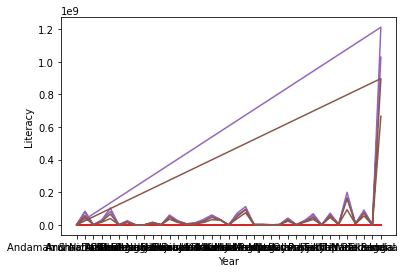

In [5]:
# plot graph
plt.xlabel('Year')
plt.ylabel('Literacy')
plt.plot(index_data)

### Determing rolling standard deviation

In [6]:
rolmean = index_data.rolling(window=2).mean()
rolstd = index_data.rolling(window=2).std()
print(rolmean, rolstd)

                             Year  Literacy Rate  Male Literacy  \
State                                                             
Andaman & Nicobar Islands     NaN            NaN            NaN   
Andhra Pradesh             2011.0         76.850      82.450000   
Arunachal Pradesh          2011.0         67.200      74.250000   
Assam                      2011.0         70.100      76.250000   
Bihar                      2011.0         68.500      76.150000   
...                           ...            ...            ...   
Uttar Pradesh              2001.0         64.730      33.486808   
Uttarakhand                2001.0         63.945      33.080704   
West Bengal                2001.0         70.130      36.280393   
Telangana                  2001.0         64.555      33.396275   
India                      2001.0         62.655      32.413347   

                           Female Literacy  total Population  \
State                                                          


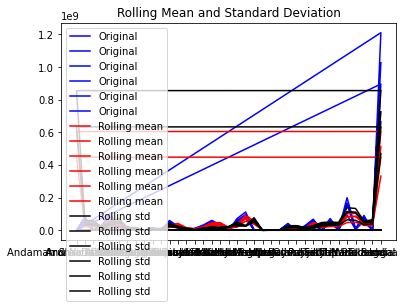

In [7]:
# plotting rolling mean and standard deviation
original = plt.plot(index_data,color='blue', label='Original')
mean = plt.plot(rolmean, color='red',label='Rolling mean')
std = plt.plot(rolstd, color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [8]:
# Perform Dickey Fuller Test
''' 
H0 = p value should always be less
critical value should be similar to test statistic
here both conditiosn are true , therefore we can accept H0
SO we can say that data is somewhat stationary
'''
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey fuller test: ')
dftest = adfuller(index_data['Literacy Rate'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#lags used', 'Number of Observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey fuller test: 
Test Statistic                 -2.195353
p-value                         0.207936
#lags used                      4.000000
Number of Observations used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


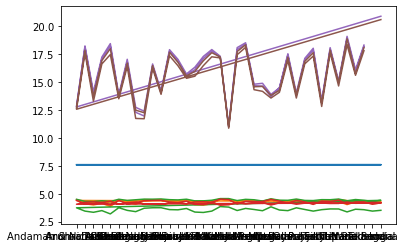

In [9]:
# Estimating trend
index_data_logScale = np.log(index_data)
plt.plot(index_data_logScale)